### Домашнее задание Transformers Training (50 баллов)

В этом домашнем задании требуется обучить несколько Transformer-based моделей в задаче машинного перевода. Для обучения можно воспользоваться текущим проектом, так и реализовать свой пайплайн обучения. Если будете использовать проект, теги **TODO** проекта отмечают, какие компоненты надо реализовать.
В ноутбуке нужно только отобразить результаты обучения и выводы. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Ваш код обучения нужно выложить на ваш github, в строке ниже дать ссылку на него. В первую очередь будут оцениваться результаты в ноутбуке, код нужен для проверки адекватности результатов. 

Обучать модели до конца не нужно, только для демонстрации, что модель обучается и рабочая - снижение val_loss, рост bleu_score.

#### Сcылка на ваш github с проектом(вставить свой) - https://github.com/megnar/machine-translation

Ноутбук с результатами выкладывать на ваш **google диск** курса. 

### Данные

`
wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip
`

Модели нужно обучить на задаче перевода с английского на русский. 

In [ ]:
!pip install torch==2.0.0
!pip install numpy==1.23.5
!pip install torchtext==0.15.1
!pip install tqdm==4.64.1
!pip install tokenizers==0.13.3
!pip install matplotlib
!pip install prettytable


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/DL/pytorch-machine-translation-hw.zip", 'r') as zip_ref:
    zip_ref.extractall("")

### Обучение Seq2seq Transformer модель(25 баллов)

Реализуйте Seq2seq Transformer. В качестве блока трансформера можно использовать https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html. В качестве токенизатора воспользуйтесь HuggingFace токенизатор для source/target языков - https://huggingface.co/docs/transformers/fast_tokenizers
В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. 

Не забудьте остальные элементы модели:
* Мы можем использовать 1 трансформер как энкодер - декодером будет выступать линейный слой. 
* Обучите свой BPE токенизатор - https://huggingface.co/docs/transformers/fast_tokenizers
* Матрицу эмбеддингов токенов
* Матрицу позицонных эмбеддингов
* Линейный слой проекции в target словарь
* Функцию маскирования будущих состояний attention, так как модель авто-регрессионна
* Learning rate schedualer


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, размерность скрытого слоя, количетсво слоев
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [ ]:
# CODE HERE

In [112]:
import torch
import math

import ast
from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [2]:
torch.cuda.is_available()

True

In [4]:
import train_seq2seq_transformer as tst

In [139]:
model, dm, train_dataloader, val_dataloader = tst.main()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [1:26:51<00:00, 260.57s/it, Current BLEU=0.33, val loss=1.31, train loss=0.669]


Last 19 epoch train loss:  0.6687015348396719
Last 19 epoch val loss:  1.3077013500034809
Last 19 epoch val bleu:  0.3295813941735163


In [ ]:
# тестирование 
for i in train_dataloader:# target_tokenizer source_tokenizer
    print(''.join(dm.source_tokenizer.decode(list(i[0][0]))))
    print(''.join(dm.target_tokenizer.decode(list(i[1][0]))))
    print(''.join(dm.target_tokenizer.decode(list(model.forward(i)[0][0]))))
    
    pred = model.predict(i[0])
    print(''.join(dm.target_tokenizer.decode(list(pred[0]))))

In [142]:
loop_cost = -1
table_print = PrettyTable()
table_print.field_names = ["source text", "true target text", "predicted target text"]

for i in train_dataloader:
    pred = model.predict(i[0])
    for j in range(len(i[1])):
        table_print.add_row([''.join(dm.source_tokenizer.decode(list(i[0][j]))),
                             ''.join(dm.target_tokenizer.decode(list(i[1][j]))),
                             ''.join(dm.target_tokenizer.decode(list(pred[j])))
                            ])
        loop_cost+=1
        if loop_cost >=20:
            break
    if loop_cost>=20:
        break
print(table_print)

+--------------------------------------+------------------------------------+------------------------------------+
|             source text              |          true target text          |       predicted target text        |
+--------------------------------------+------------------------------------+------------------------------------+
|   i hung the painting on the wall    |     я повесил картину на стене     |      солесьл ноктинуна птонен      |
|          tom was also shot           |       в тома тоже выстрелили       |         тома баже быстрелии        |
|  i d like to get to know you better  |   я хотел бы узнать тебя получше   |    хотел бы тзнать тебя получше    |
|             i m the law              |            я это закон             |             вто ва онч             |
|       isn t this what you want       |      это не то что ты хочешь       |       то не то чео ты хочешь       |
| i want to know why tom couldn t come | я хочу знать почему том не смог пр |  з

In [143]:
data_graf = {'val_loss': [], 'train_loss': [], 'bleu_score': []}
lebes = ['val_loss', 'train_loss', 'bleu_score']

with open("training_logs/progress_log.txt", 'r') as f:
    description_model = f.readline()
    for lin in f:
        line = ast.literal_eval(lin)
        for leb in lebes:
            data_graf[leb].append(line[leb])

In [144]:
description_model = ast.literal_eval(description_model)

In [145]:
table_print = PrettyTable()
table_print.field_names = ["параметры", "значения"]

for i in description_model:
    table_print.add_row((i, description_model[i]))
    
print(table_print)

+-----------------+----------+
|    параметры    | значения |
+-----------------+----------+
|  embedding_size |   256    |
|    num_layers   |    3     |
|      nhead      |    8     |
|    vocab_size   |    50    |
| dim_feedforward |   256    |
|  learning_rate  |  0.001   |
|    epoch_num    |    20    |
|  try_one_batch  |  False   |
+-----------------+----------+


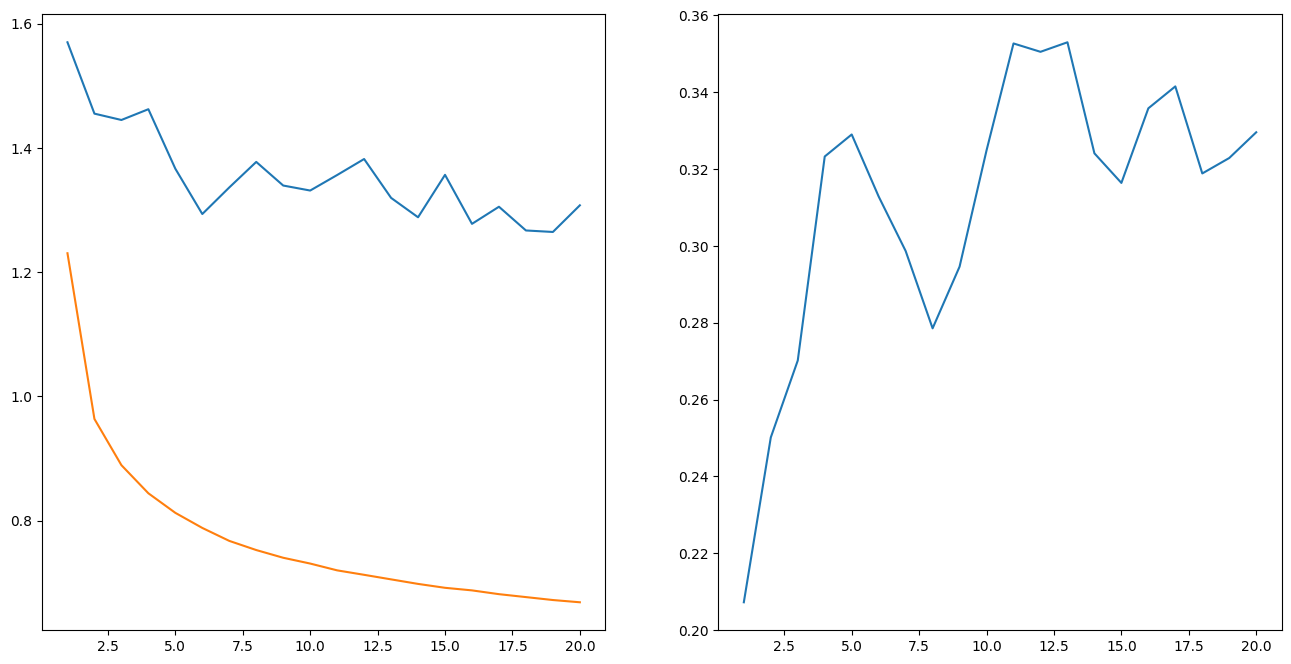

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(16, 8, forward=True)

x = range(1, len(data_graf["bleu_score"])+1 )

y = data_graf['val_loss']
y1 = data_graf['train_loss']
y2 = data_graf['bleu_score']

ax1.plot(x, y)
ax1.plot(x, y1)
ax2.plot(x, y2)

plt.show()

### Fine-tune pretrained T5 (25 баллов)

Реализуйте Seq2seq Pretrained T5. Воспользуйтесь https://huggingface.co/docs/transformers/model_doc/t5 предобученной моделью. В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Не забудьте важные аспекты обучения модели:
* Взять готовый t5 токенизатор
* Resize matrix embedding - скорей всего ваша матрица эмбеддингов не будет включать эмбеддинги из вашего сета. Пример обновления матрицы эмбеддингов тут тут https://github.com/runnerup96/Transformers-Tuning/blob/main/t5_encoder_decoder.py
* Learning rate schedualer/Adafactor with constant learning rate


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, pretrained model name
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [6]:
# CODE HERE

In [1]:
import torch
import math

import ast
from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [19]:
torch.cuda.is_available()

True

In [20]:
import train_seq2seq_transformer as tst

In [21]:
model, dm, train_dataloader, val_dataloader = tst.main()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [1:52:53<00:00, 677.35s/it, Current BLEU=0.48, val loss=1.05, train loss=0.509]


Last 9 epoch train loss:  0.509242075436502
Last 9 epoch val loss:  1.0491003639996053
Last 9 epoch val bleu:  0.47987585539727196


In [26]:
loop_cost = -1
table_print = PrettyTable()
table_print.field_names = ["source text", "true target text", "predicted target text"]

for i in train_dataloader:
    model.eval()
    with torch.no_grad():

        for j in range(len(i[0])):
            src, trg, mask = i
            pred = model.predict(torch.IntTensor([src[j].tolist()]), torch.IntTensor([mask[j].tolist()]), max_len=34)
            table_print.add_row([''.join(dm.tokenizer.decode(src[j].tolist())),
                                ''.join(dm.tokenizer.decode(trg[j].tolist())),
                                ''.join(dm.tokenizer.decode(pred[0]))
                                ])
            loop_cost+=1
            if loop_cost >=20:
                break
        if loop_cost>=20:
            break
print(table_print)

+----------------------------------------------+-----------------------------------------------+------------------------------------------------+
|                 source text                  |                true target text               |             predicted target text              |
+----------------------------------------------+-----------------------------------------------+------------------------------------------------+
|           can t you  vacuum  later           |     ты не  мож ешь попы лесосить попозж е     |       не  мож ешь потом  табуить поззж е       |
|       he  saw the  bird  in the  tree        |         он  увидел п тиц у на д ереве         |        он в увидел п тиц у в д еревоуре        |
|    tom  doesn t wa nt  to  see  mary  now    |      том не хоч ет с ейч ас в идеть мэ ри     |        не хоч ет с ейч ас в идеть мэ ри        |
|       who  gave you  my  phone  number       |         кто  тебе  дал м ой  телеф он         |         кто  дабе  дал м нй

In [27]:
data_graf = {'val_loss': [], 'train_loss': [], 'bleu_score': []}
lebes = ['val_loss', 'train_loss', 'bleu_score']

with open("training_logs/progress_log.txt", 'r') as f:
    description_model = f.readline()
    for lin in f:
        line = ast.literal_eval(lin)
        for leb in lebes:
            data_graf[leb].append(line[leb])

In [28]:
description_model = ast.literal_eval(description_model)

In [29]:
table_print = PrettyTable()
table_print.field_names = ["параметры", "значения"]

for i in description_model:
    table_print.add_row((i, description_model[i]))
    
print(table_print)

+-----------------+----------+
|    параметры    | значения |
+-----------------+----------+
|  embedding_size |   256    |
|    num_layers   |    3     |
|      nhead      |    8     |
|    vocab_size   |   150    |
| dim_feedforward |   256    |
|  learning_rate  |  0.001   |
|    epoch_num    |    10    |
|  try_one_batch  |  False   |
+-----------------+----------+


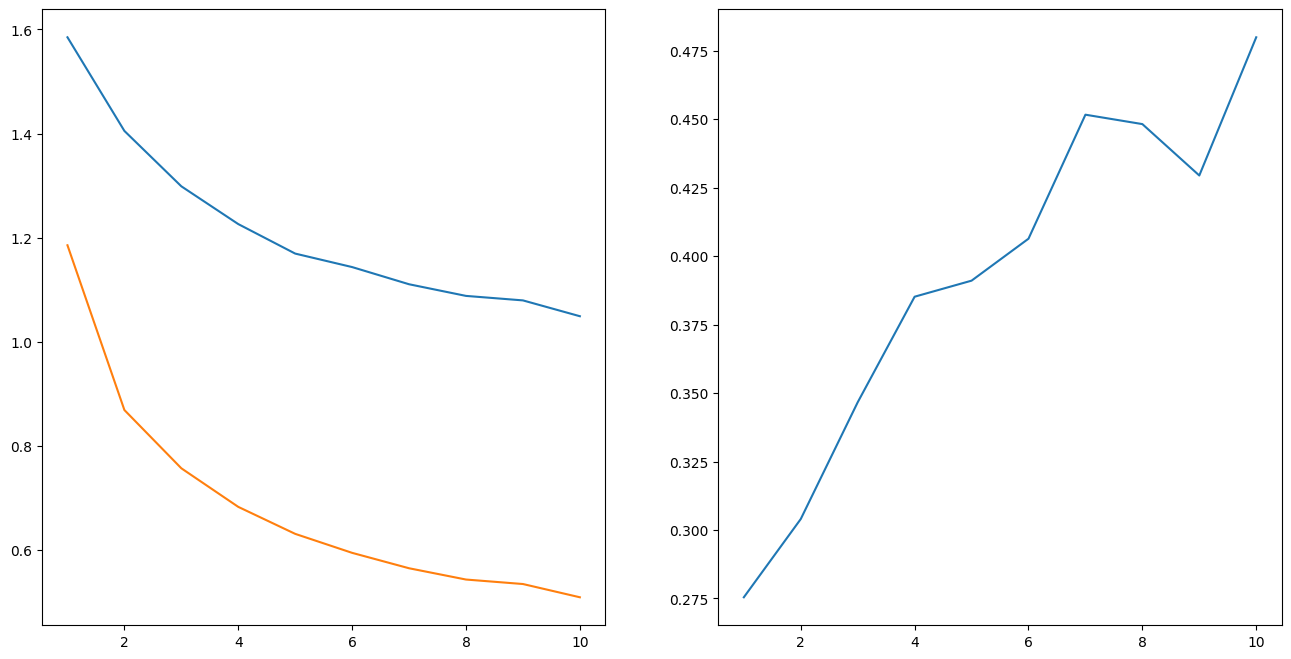

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(16, 8, forward=True)

x = range(1, len(data_graf["bleu_score"])+1 )

y = data_graf['val_loss']
y1 = data_graf['train_loss']
y2 = data_graf['bleu_score']

ax1.plot(x, y)
ax1.plot(x, y1)
ax2.plot(x, y2)

plt.show()